# Варіант 1
Номер студенського: 11307984
84 mod 7 + 1 = 1

#### Отже аналізуємо canadian_lynx.csv


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from random import randrange
from pandas import Series
%matplotlib inline

In [2]:
ts_lynx = pd.Series.from_csv("data/canadian_lynx.csv")

/anaconda3/lib/python3.5/site-packages/pandas/core/series.py:3727: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  infer_datetime_format=infer_datetime_format)


In [3]:
ts_lynx.head()

1821-01-01     269
1822-01-01     321
1823-01-01     585
1824-01-01     871
1825-01-01    1475
dtype: int64

In [4]:
ts_lynx.tail()

1930-01-01     662
1931-01-01    1000
1932-01-01    1590
1933-01-01    2657
1934-01-01    3396
dtype: int64

In [5]:
ts_lynx.describe()

count     114.000000
mean     1538.017544
std      1585.843914
min        39.000000
25%       348.250000
50%       771.000000
75%      2566.750000
max      6991.000000
dtype: float64

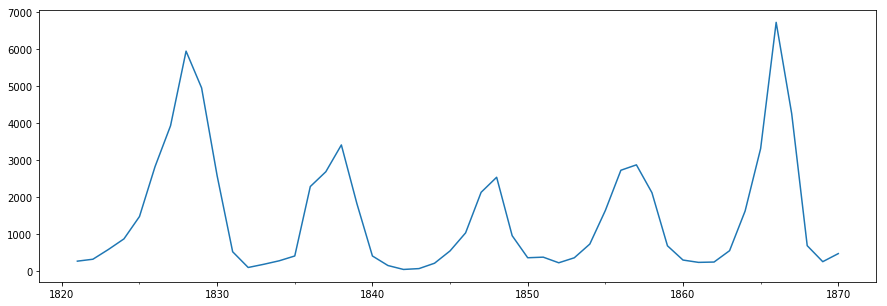

In [6]:
ts_lynx[:50].plot(figsize=(15, 5))

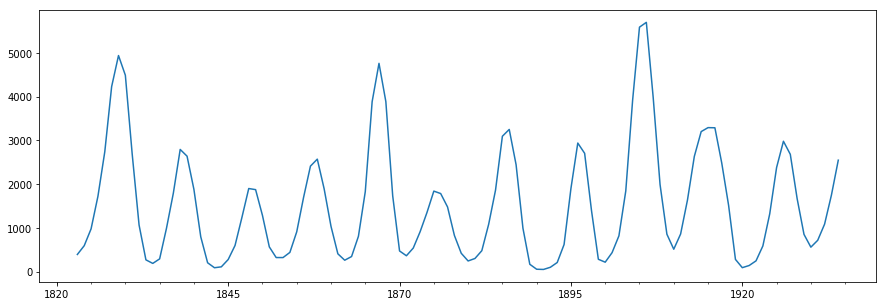

In [7]:
ts_lynx_ma = ts_lynx.rolling(3).mean()
ts_lynx_ma.plot(figsize=(15, 5))

## 1. Валідація двох альтернатив: additive VS multiplicative;

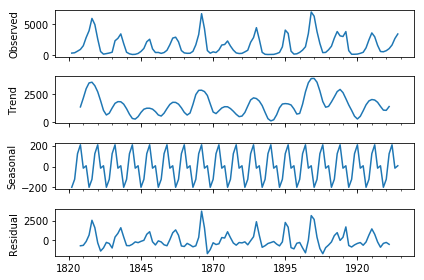

In [8]:
additive_decomposition = seasonal_decompose(ts_lynx, model='additive', freq=6)
additive_decomposition.plot()
plt.show()

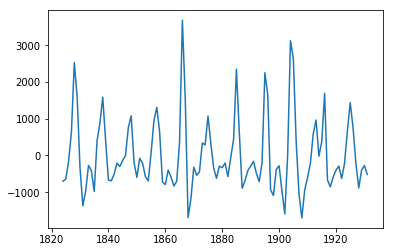

In [9]:
additive_residuals = additive_decomposition.resid.dropna()
plt.plot(additive_residuals)

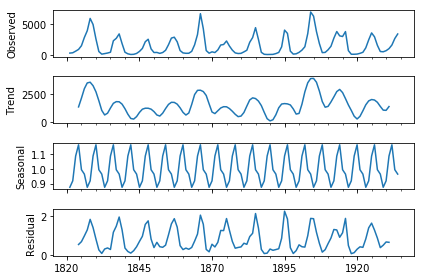

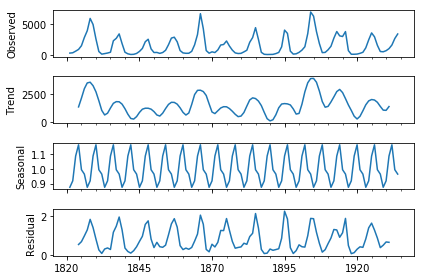

In [10]:
multiplicative_decomposition = seasonal_decompose(ts_lynx, model='multiplicative', freq=6)
multiplicative_decomposition.plot()

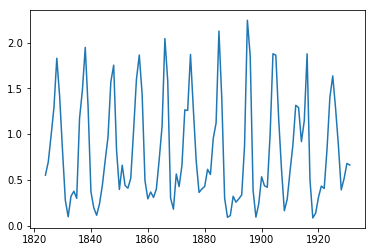

In [11]:
multiplicative_residuals = multiplicative_decomposition.resid.dropna()
plt.plot(multiplicative_residuals)

[1.0, 0.2191694126721229, 0.050033391945294034, 0.16863900123860223, 0.0914215347942165, 0.05210840205077095]
1.5813717427010066


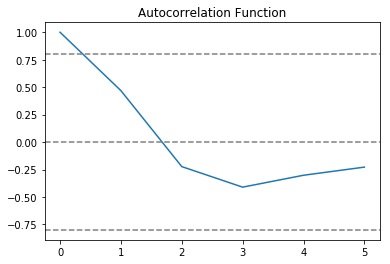

In [12]:
from statsmodels.tsa.stattools import acf, pacf
additive_residuals_lag_acf = acf(additive_residuals, nlags=5)
#Plot ACF: 
plt.plot(additive_residuals_lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(additive_residuals_lag_acf)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(additive_residuals_lag_acf)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

# Calculate sum of squares of correlation values.
additive_residuals_lag_acf = [x**2 for x in additive_residuals_lag_acf]
print(additive_residuals_lag_acf)
print(sum(additive_residuals_lag_acf))

2.067255244741624


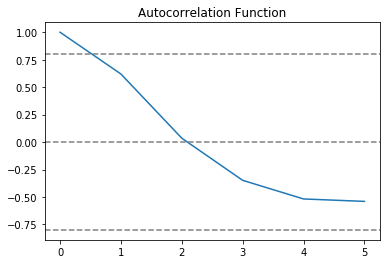

In [13]:
multiplicative_residuals_lag_acf = acf(multiplicative_residuals, nlags=5)
#Plot ACF: 
plt.plot(multiplicative_residuals_lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(multiplicative_residuals_lag_acf)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(multiplicative_residuals_lag_acf)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

# Calculate sum of squares of correlation values.
multiplicative_residuals_lag_acf = [x**2 for x in multiplicative_residuals_lag_acf]
print(sum(multiplicative_residuals_lag_acf))

In [14]:
if sum(multiplicative_residuals_lag_acf) > sum(additive_residuals_lag_acf): 
    print("Better use Additive model")
else: 
    print("Better use Multiplicative model")

Better use Additive model


## 2. Описова частина (Moving Average, Exponential Smoothing, Differencing, Stationarity);

In [15]:
ts_lynx.head()

1821-01-01     269
1822-01-01     321
1823-01-01     585
1824-01-01     871
1825-01-01    1475
dtype: int64

### Moving Average

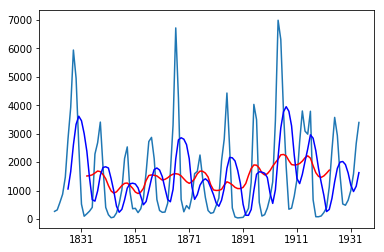

In [16]:
ts_lynx_moving_avg_center = ts_lynx.rolling(24, center=True).mean()
ts_lynx_moving_avg_right = ts_lynx.rolling(6, center=False).mean()
plt.plot(ts_lynx)
plt.plot(ts_lynx_moving_avg_center, color='red')
plt.plot(ts_lynx_moving_avg_right, color='blue')

### Differencing

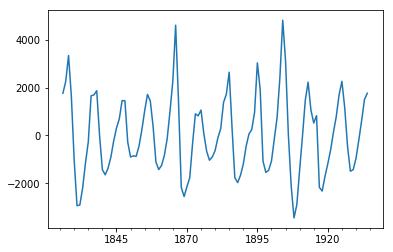

In [17]:
ts_lynx_ma_diff = ts_lynx - ts_lynx_moving_avg_right
ts_lynx_ma_diff.plot()

In [18]:
np.nanmean(ts_lynx_ma_diff)

32.89755351681955

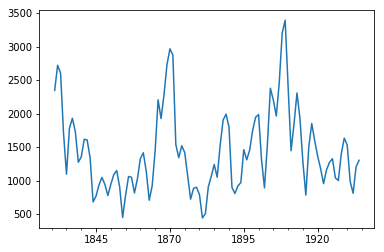

In [19]:
ts_lynx_ma_diff.rolling(6).std().plot()

In [20]:
from statsmodels.tsa.stattools import adfuller
def stationarity_test(data):
    
    rolmean = data.rolling(6).mean()
    rolstd = data.rolling(6).std()

    orig = plt.plot(data, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')

    # Dickey-Fuller test:
    print("Results of Dickey-Fuller Test:")
    dftest = adfuller(data, autolag='AIC')
    print(dftest)     
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

Results of Dickey-Fuller Test:
(-2.9963036751425576, 0.03524103535901378, 7, 106, {'5%': -2.8892174239808703, '10%': -2.58153320754717, '1%': -3.4936021509366793}, 1635.975223662428)
Test Statistic                  -2.996304
p-value                          0.035241
#Lags Used                       7.000000
Number of Observations Used    106.000000
Critical Value (5%)             -2.889217
Critical Value (10%)            -2.581533
Critical Value (1%)             -3.493602
dtype: float64


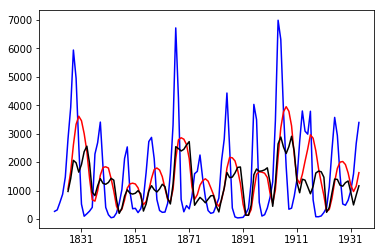

In [21]:
stationarity_test(ts_lynx)

#### p-value is 0.35 > 0.25 => data is not stationary

### Exponential Smoothing

In [22]:
expwighted_avg = ts_lynx.ewm(span=6).mean()

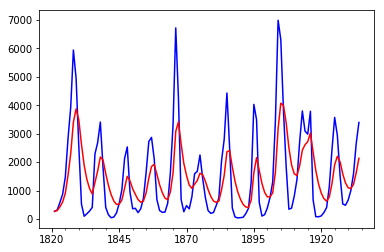

In [23]:
ts_lynx.plot(color="blue", label="Original")
expwighted_avg.plot(color="red", label="EWMA")

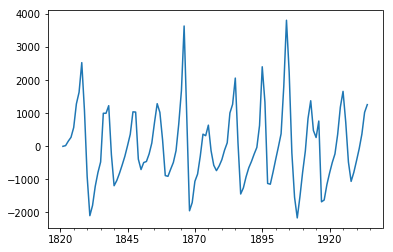

In [24]:
ts_lynx_exp_diff = ts_lynx - expwighted_avg
ts_lynx_exp_diff.plot()

Results of Dickey-Fuller Test:
(-5.210589329147284, 8.36481037034057e-06, 7, 106, {'5%': -2.8892174239808703, '10%': -2.58153320754717, '1%': -3.4936021509366793}, 1575.4797343854711)
Test Statistic                  -5.210589
p-value                          0.000008
#Lags Used                       7.000000
Number of Observations Used    106.000000
Critical Value (5%)             -2.889217
Critical Value (10%)            -2.581533
Critical Value (1%)             -3.493602
dtype: float64


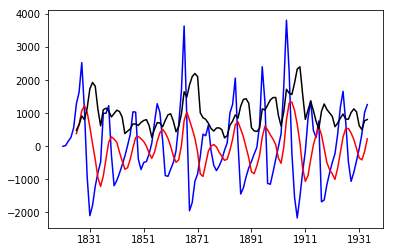

In [25]:
stationarity_test(ts_lynx_exp_diff)

#### Now p-value is 0.000008 => the data is transformed to stationary

## 3. Валідація двох альтернатив приведення до стаціонарного ряду: decomposition VS differencing;

### Differencing

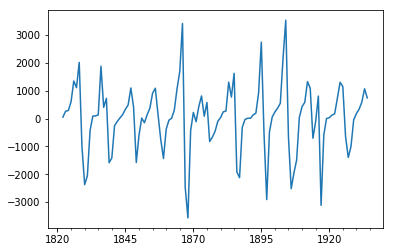

In [26]:
ts_lynx_diff = ts_lynx - ts_lynx.shift(1)
ts_lynx_diff.plot()

Results of Dickey-Fuller Test:
(-8.618807046075478, 6.1850380835898e-14, 7, 105, {'5%': -2.889485291005291, '10%': -2.5816762131519275, '1%': -3.4942202045135513}, 1624.7024520915388)
Test Statistic                -8.618807e+00
p-value                        6.185038e-14
#Lags Used                     7.000000e+00
Number of Observations Used    1.050000e+02
Critical Value (5%)           -2.889485e+00
Critical Value (10%)          -2.581676e+00
Critical Value (1%)           -3.494220e+00
dtype: float64


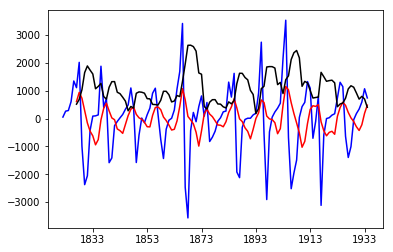

In [27]:
ts_lynx_diff.dropna(inplace=True)
stationarity_test(ts_lynx_diff)

### Decomposition

In [28]:
def _decompose(data, freq):
    decomposition = seasonal_decompose(data, freq=freq)

    trend = decomposition.trend
    seasonal = decomposition.seasonal
    residual = decomposition.resid

    plt.subplot(411)
    plt.plot(data, label='Original')
    plt.legend(loc='best')
    plt.subplot(412)
    plt.plot(trend, label='Trend')
    plt.legend(loc='best')
    plt.subplot(413)
    plt.plot(seasonal,label='Seasonality')
    plt.legend(loc='best')
    plt.subplot(414)
    plt.plot(residual, label='Residuals')
    plt.legend(loc='best')
    plt.tight_layout()
    return residual

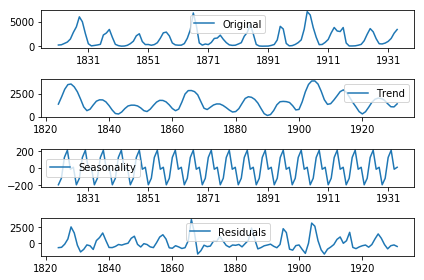

In [29]:
res = _decompose(ts_lynx, 6)

Results of Dickey-Fuller Test:
(-6.846801550997376, 1.7344825233442098e-09, 9, 98, {'5%': -2.891516256916761, '10%': -2.5827604414827157, '1%': -3.4989097606014496}, 1460.226530414106)
Test Statistic                -6.846802e+00
p-value                        1.734483e-09
#Lags Used                     9.000000e+00
Number of Observations Used    9.800000e+01
Critical Value (5%)           -2.891516e+00
Critical Value (10%)          -2.582760e+00
Critical Value (1%)           -3.498910e+00
dtype: float64


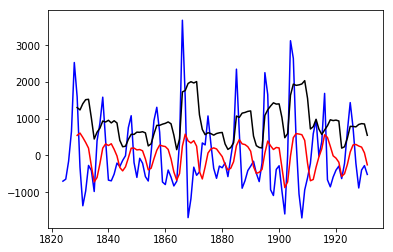

In [30]:
res.dropna(inplace=True)
stationarity_test(res)

#### Differencing gives better p-value

## 4. Тренування та валідація MA, AR, ARMA, ARIMA моделей;

In [31]:
from statsmodels.tsa.arima_model import ARIMA
#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(res, nlags=5)
lag_pacf = pacf(res, nlags=5, method='ols')

[ 1.          0.46815533 -0.22368145 -0.41065679 -0.30235994 -0.22827265]


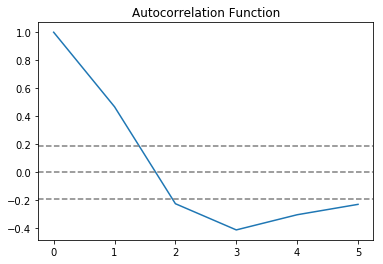

In [32]:
#Plot ACF: 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(res)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(res)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')
print(lag_acf)

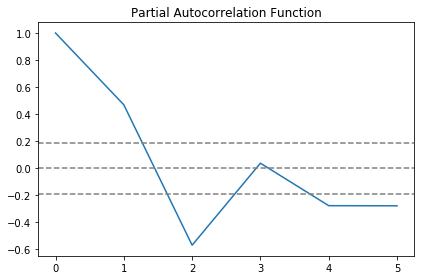

In [33]:
#Plot PACF:
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(res)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(res)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

### AR model

/anaconda3/lib/python3.5/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)


Text(0.5,1,'RMSE: 7516.0767')

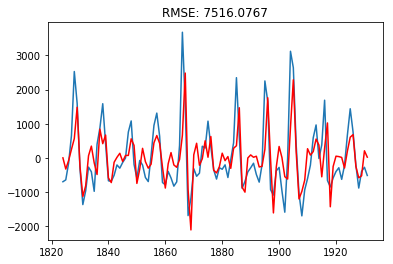

In [34]:
model = ARIMA(res, order=(2, 0, 0))  
results_AR = model.fit(disp=-1)  
plt.plot(res)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RMSE: %.4f'% np.sqrt(sum((results_AR.fittedvalues-res)**2)))

/anaconda3/lib/python3.5/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)


Text(0.5,1,'RMSE: 6539.0004')

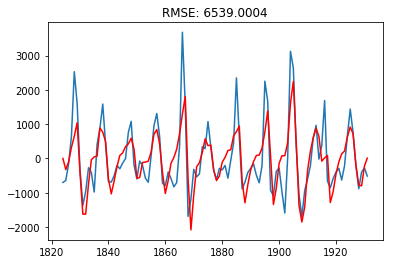

In [35]:
model = ARIMA(res, order=(2, 0, 1))  
results_ARMA = model.fit(disp=-1)  
plt.plot(res)
plt.plot(results_ARMA.fittedvalues, color='red')
plt.title('RMSE: %.4f'% np.sqrt(sum((results_ARMA.fittedvalues-res)**2)))

/anaconda3/lib/python3.5/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)


Text(0.5,1,'RMSE: 7939.9845')

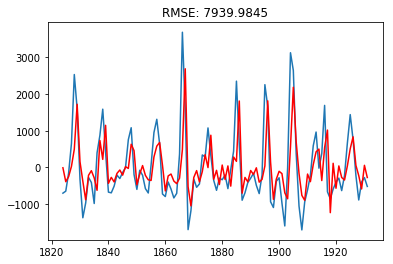

In [36]:
model = ARIMA(res, order=(1, 0, 1))  
results_ARMA = model.fit(disp=-1)  
plt.plot(res)
plt.plot(results_ARMA.fittedvalues, color='red')
plt.title('RMSE: %.4f'% np.sqrt(sum((results_ARMA.fittedvalues-res)**2)))

## 5.  Генерація фіч та валідація ML моделей (тут на Ваш смак будь-які з відомих регресивних моделей). 
##### Буде вважатися плюсом додавання додаткових екзогенних факторів, таких як опади, площі і тп.

In [37]:
ts_train = ts_lynx[ts_lynx.index<"1900"]
ts_valid = ts_lynx[ts_lynx.index>="1900"]

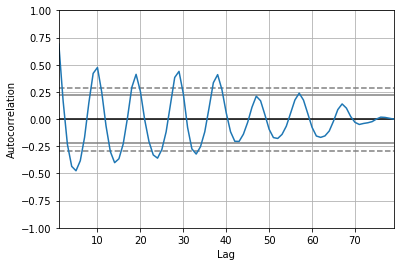

In [38]:
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(ts_train)

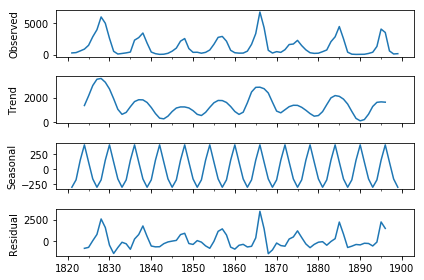

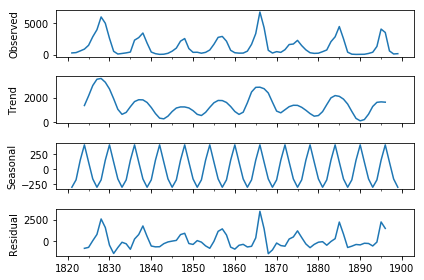

In [39]:
decompose = seasonal_decompose(ts_train, freq=6)
decompose.plot()

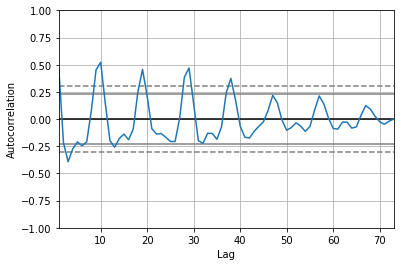

In [40]:
residuals = decompose.resid.dropna()
autocorrelation_plot(residuals)

In [41]:
def test_stationary(ts):
    result = adfuller(ts)

    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')

    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

test_stationary(residuals)

ADF Statistic: -8.107049
p-value: 0.000000
Critical Values:
	5%: -2.907
	10%: -2.591
	1%: -3.535


## 6. Висновки щодо того, яку модель краще використовувати;

/anaconda3/lib/python3.5/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)


Text(0.5,1,'RMSE: 6539.0004')

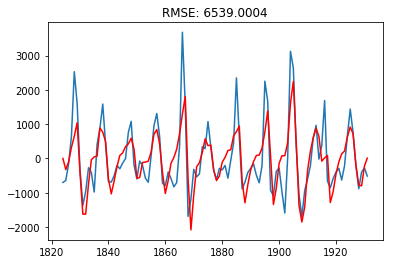

In [42]:
model = ARIMA(res, order=(2, 0, 1))  
results_ARMA = model.fit(disp=-1)  
plt.plot(res)
plt.plot(results_ARMA.fittedvalues, color='red')
plt.title('RMSE: %.4f'% np.sqrt(sum((results_ARMA.fittedvalues-res)**2)))

#### ARMA with RMSE: 6539.0015

## 7.  Прогноз на наступний рік

In [43]:
model = ARIMA(residuals, order=(2, 0, 1))
model_fit = model.fit()

/anaconda3/lib/python3.5/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)


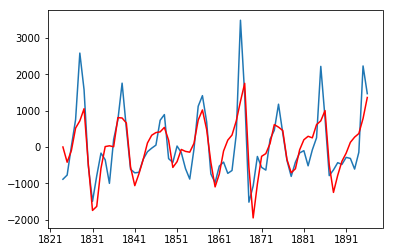

In [44]:
forecast = model_fit.fittedvalues
plt.plot(residuals)
plt.plot(forecast, color='red')
plt.show()

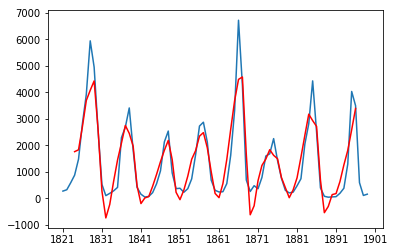

In [45]:
plt.plot(ts_train)
plt.plot(forecast.add(decompose.seasonal).add(decompose.trend).dropna(), color="red")

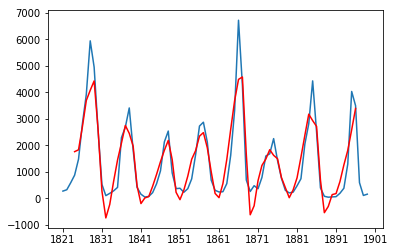

In [46]:
plt.plot(ts_train)
plt.plot(forecast.add(decompose.seasonal).add(decompose.trend).dropna(), color="red")